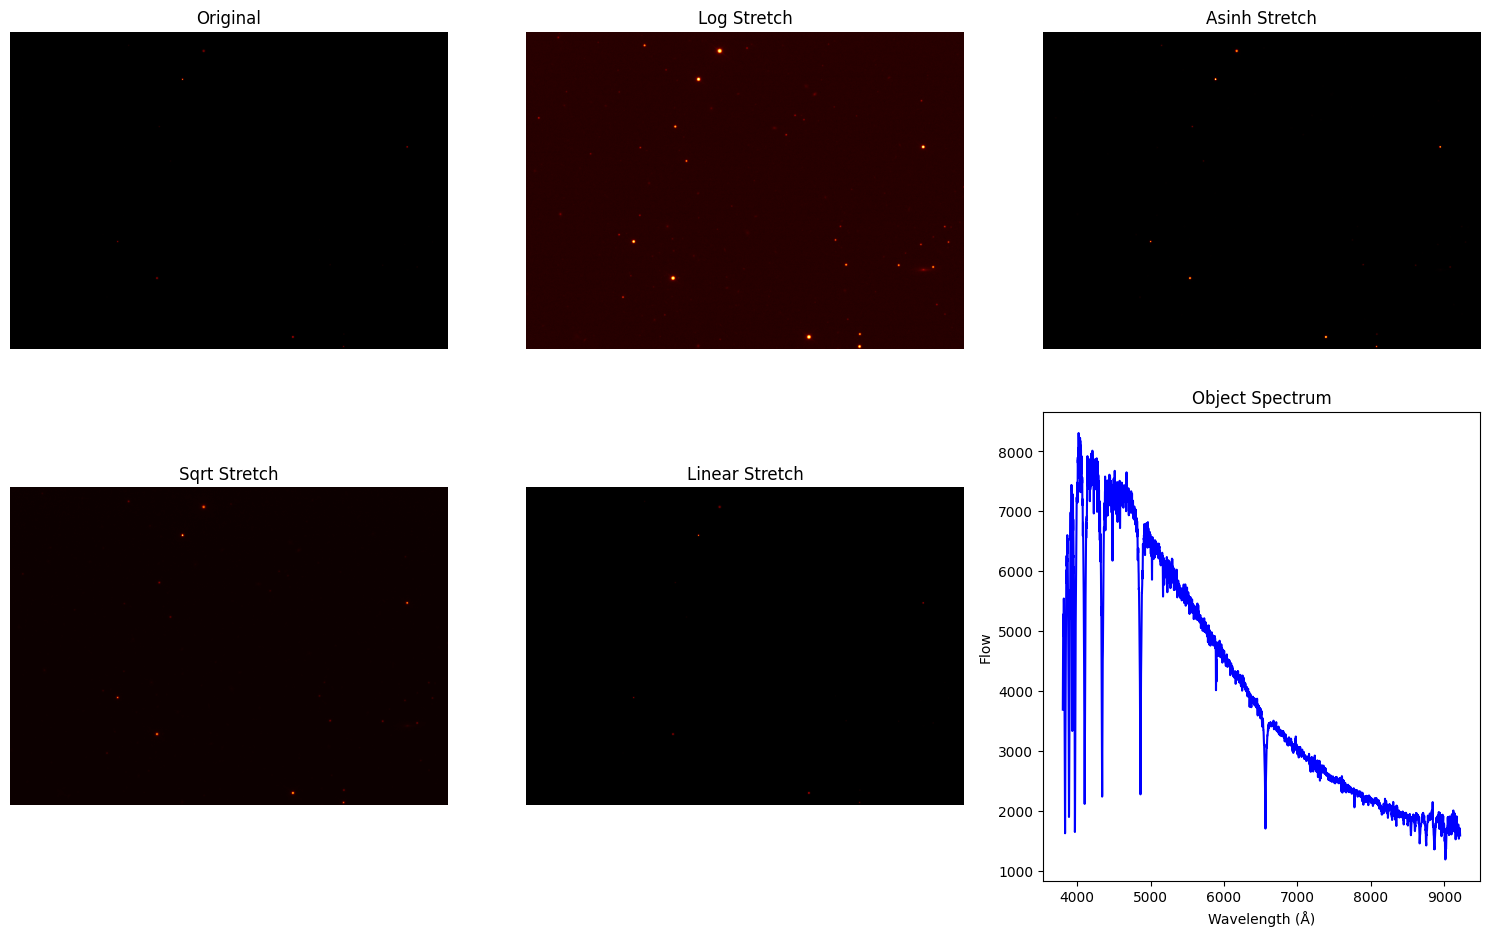

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import fitsio
import os
from astropy.visualization import LogStretch, AsinhStretch, ImageNormalize, simple_norm

def read_fits_image(fits_path):
    with fitsio.FITS(fits_path) as fits:
        img_data = fits[0].read()
    return img_data

def read_fits_spectrum(fits_path):
    with fitsio.FITS(fits_path) as fits:
        data = fits[1].read()
        flux = data['flux']
        wavelength = 10**data['loglam']
    return wavelength, flux

def plot_fits_variants(image_path, spectrum_path):
    img = read_fits_image(image_path)
    wl, flux = read_fits_spectrum(spectrum_path)
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    stretches = [None, LogStretch(), AsinhStretch(), 'sqrt', 'linear']
    titles = ["Original", "Log Stretch", "Asinh Stretch", "Sqrt Stretch", "Linear Stretch"]
    
    for i, (stretch, title) in enumerate(zip(stretches, titles)):
        ax = axes[i // 3, i % 3]
        if stretch is None:
            norm = None
        elif isinstance(stretch, str):
            norm = simple_norm(img, stretch=stretch)
        else:
            norm = ImageNormalize(img, stretch=stretch)
        ax.imshow(img, cmap='afmhot', norm=norm)
        ax.set_title(title)
        ax.axis('off')
    
    ax_spec = axes[1, 2]
    ax_spec.plot(wl, flux, color='blue')
    ax_spec.set_xlabel("Wavelength (Å)")
    ax_spec.set_ylabel("Flow")
    ax_spec.set_title("Object Spectrum")
    
    plt.tight_layout()
    plt.show()

image_path = "data/images/301/3565/1/frame-g-003565-1-0058.fits.bz2"
spectrum_path = "data/spectra/blue_star.fits"

plot_fits_variants(image_path, spectrum_path)